<a href="https://colab.research.google.com/github/suman-mondal14/AI-Job-Market-Insights/blob/main/job_market_insights_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'ai_job_market_insights.csv'
data = pd.read_csv(file_path)

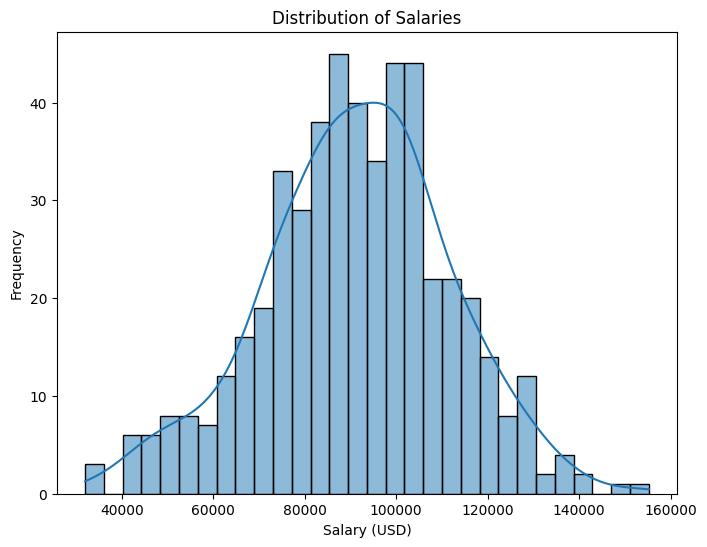

In [28]:
# Visualize the distribution of Salary
plt.figure(figsize=(8, 6))
sns.histplot(data['Salary_USD'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Selecting relevant features for predicting Salary
features = data[['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Remote_Friendly']]
target = data['Salary_USD']

In [18]:
# Preprocessing - One Hot Encoding for categorical features
categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Remote_Friendly']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [20]:
# Creating a pipeline with preprocessing and Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Job_Title', 'Industry',
                                                   'Company_Size', 'Location',
                                                   'AI_Adoption_Level',
                                                   'Remote_Friendly'])])),
                ('regressor', LinearRegression())])

In [21]:
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 535535508.83177763
R-squared (R2): -0.03536896188797223


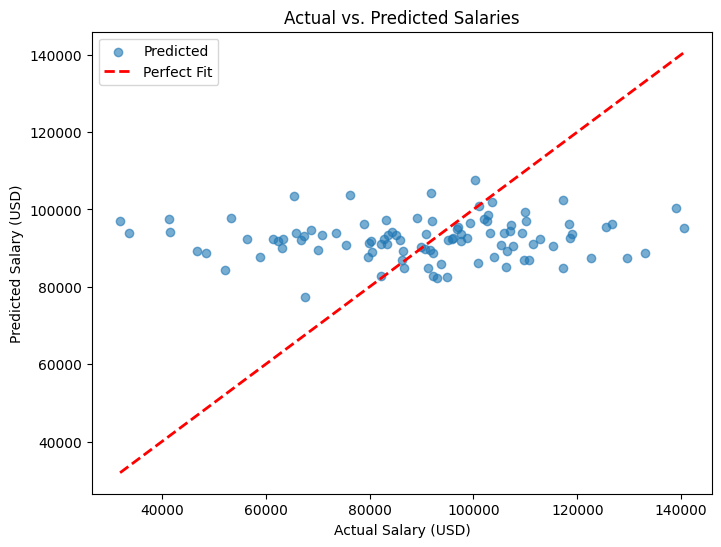

In [29]:
# Actual vs. Predicted Salaries Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Fit')
plt.title('Actual vs. Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.show()

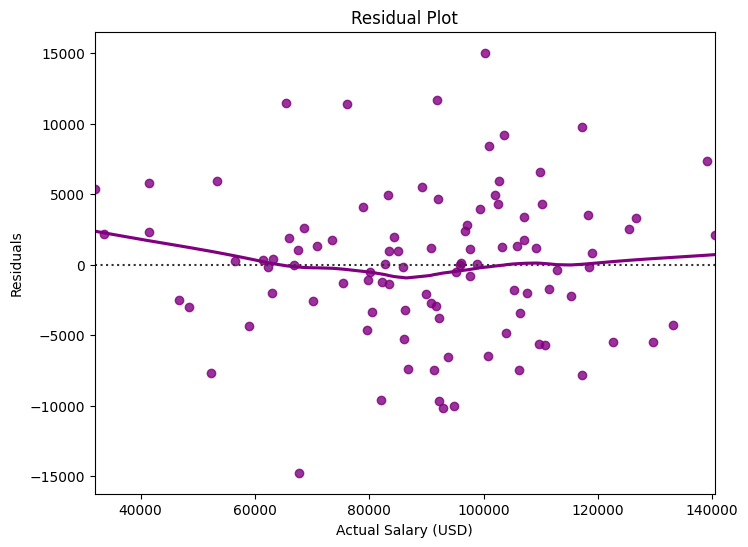

In [23]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='purple')
plt.title('Residual Plot')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Residuals')
plt.show()

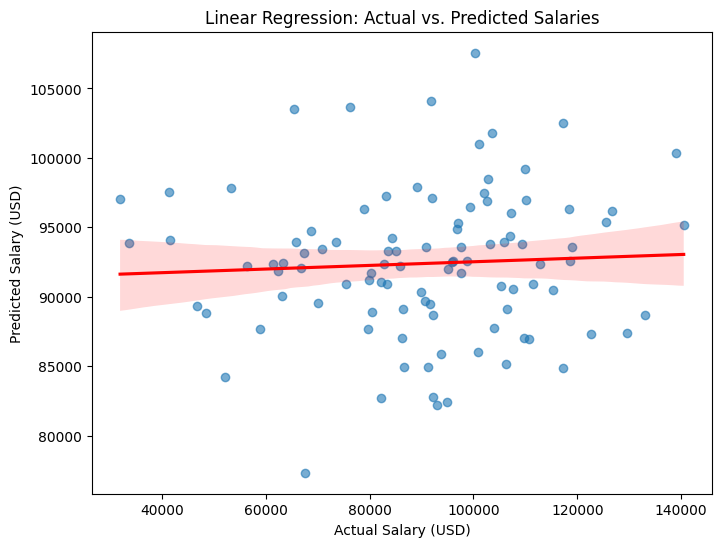

In [24]:
# Linear Regression line plot: Predicted vs. Actual values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Linear Regression: Actual vs. Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()